In [1]:
import os
import sys
sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/Snail_rop/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/Snail_rop/Snail4_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail5_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail3_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail1_NoBact.mm', '/media/cjw/Data/cyto/Snail_rop/Snail2_NoBact.mm']
(4,) [6840   64   64    5]
(4,) [4649   64   64    5]
(4,) [7729   64   64    5]
(4,) [7854   64   64    5]
(4,) [8397   64   64    5]
35469


dict_keys(['Snail4_NoBact.mm', 'Snail5_NoBact.mm', 'Snail3_NoBact.mm', 'Snail1_NoBact.mm', 'Snail2_NoBact.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

6840
4649
7729
7854
8397


Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 2), dtype=float32) (?, 32, 32, 2)


/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cjw/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Tensor("latent_space/BiasAdd:0", shape=(?, 256), dtype=float32)
isize:  4 32
Tensor("decoder_sigmoid:0", shape=(?, 32, 32, 2), dtype=float32)
35469 277 128
34957 512
Iteration:  0 Loss:  1419.7573
Test Loss 1414.7748
Iteration:  0 Loss:  1419.7573
Test Loss 1414.7748


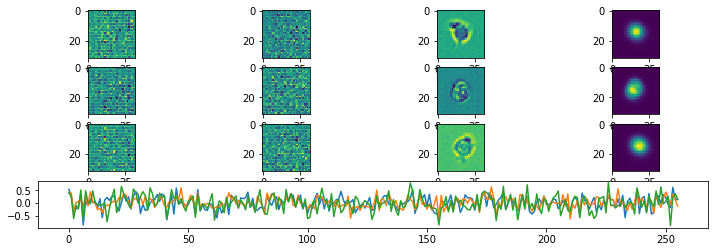

Iteration:  100 Loss:  921.3146
Test Loss 914.22015
Iteration:  200 Loss:  894.75323
Test Loss 879.5479
Iteration:  300 Loss:  877.06104
Test Loss 869.0643
Iteration:  400 Loss:  866.69257
Test Loss 864.6466
Iteration:  500 Loss:  853.4194
Test Loss 862.077
Iteration:  600 Loss:  867.6024
Test Loss 860.2716
Iteration:  700 Loss:  867.18274
Test Loss 858.95325
Iteration:  800 Loss:  858.77655
Test Loss 857.3683
Iteration:  900 Loss:  865.479
Test Loss 856.2593
Iteration:  1000 Loss:  852.3075
Test Loss 855.443
Iteration:  1000 Loss:  852.3075
Test Loss 855.443


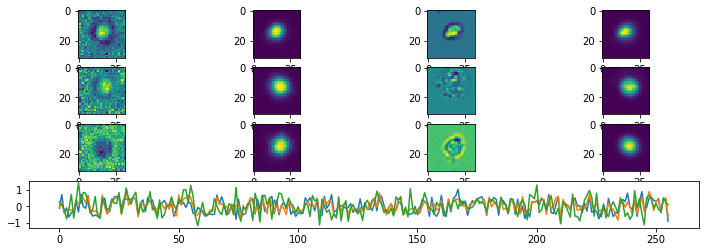

Iteration:  1100 Loss:  855.23334
Test Loss 854.0781
Iteration:  1200 Loss:  855.42773
Test Loss 852.72217
Iteration:  1300 Loss:  858.2815
Test Loss 851.5948
Iteration:  1400 Loss:  859.35425
Test Loss 850.46625
Iteration:  1500 Loss:  851.4595
Test Loss 849.8978
Iteration:  1600 Loss:  854.9588
Test Loss 848.435
Iteration:  1700 Loss:  835.3067
Test Loss 847.38776
Iteration:  1800 Loss:  852.4303
Test Loss 846.58276
Iteration:  1900 Loss:  854.7648
Test Loss 845.54144
Iteration:  2000 Loss:  858.2714
Test Loss 844.8229
Iteration:  2000 Loss:  858.2714
Test Loss 844.8229


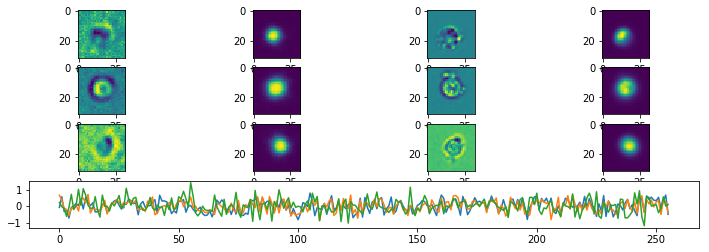

Iteration:  2100 Loss:  851.1198
Test Loss 844.14636
Iteration:  2200 Loss:  847.56506
Test Loss 843.41315
Iteration:  2300 Loss:  837.66504
Test Loss 842.6935
Iteration:  2400 Loss:  853.4418
Test Loss 842.2005
Iteration:  2500 Loss:  837.67755
Test Loss 841.7399
Iteration:  2600 Loss:  852.6102
Test Loss 841.2029
Iteration:  2700 Loss:  841.58276
Test Loss 840.721
Iteration:  2800 Loss:  846.995
Test Loss 840.2495
Iteration:  2900 Loss:  849.4454
Test Loss 839.8456
Iteration:  3000 Loss:  853.61145
Test Loss 839.604
Iteration:  3000 Loss:  853.61145
Test Loss 839.604


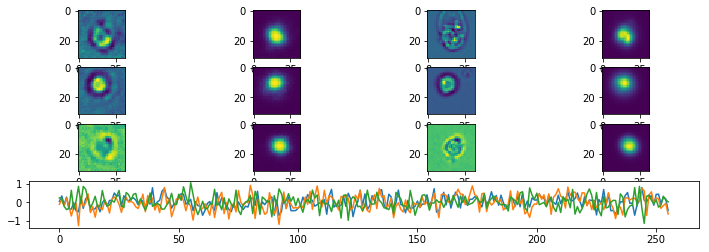

Iteration:  3100 Loss:  853.6553
Test Loss 839.57855
Iteration:  3200 Loss:  841.4115
Test Loss 838.9313
Iteration:  3300 Loss:  845.9483
Test Loss 838.6924
Iteration:  3400 Loss:  844.74426
Test Loss 838.489
Iteration:  3500 Loss:  847.13605
Test Loss 837.9918
Iteration:  3600 Loss:  835.08984
Test Loss 837.9677
Iteration:  3700 Loss:  838.2893
Test Loss 837.52405
Iteration:  3800 Loss:  835.896
Test Loss 837.13965
Iteration:  3900 Loss:  839.1462
Test Loss 837.00415
Iteration:  4000 Loss:  835.71045
Test Loss 836.7726
Iteration:  4000 Loss:  835.71045
Test Loss 836.7726


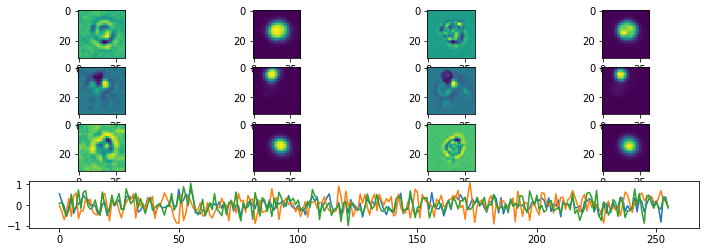

Iteration:  4100 Loss:  834.3882
Test Loss 836.5427
Iteration:  4200 Loss:  839.62994
Test Loss 836.3855
Iteration:  4300 Loss:  840.60046
Test Loss 836.2815
Iteration:  4400 Loss:  842.9214
Test Loss 836.20264
Iteration:  4500 Loss:  846.4267
Test Loss 836.00104
Iteration:  4600 Loss:  836.844
Test Loss 835.5904
Iteration:  4700 Loss:  842.1743
Test Loss 835.5064
Iteration:  4800 Loss:  836.54395
Test Loss 835.38324
Iteration:  4900 Loss:  850.5529
Test Loss 835.08453
Iteration:  5000 Loss:  842.83685
Test Loss 835.01697
Iteration:  5000 Loss:  842.83685
Test Loss 835.01697


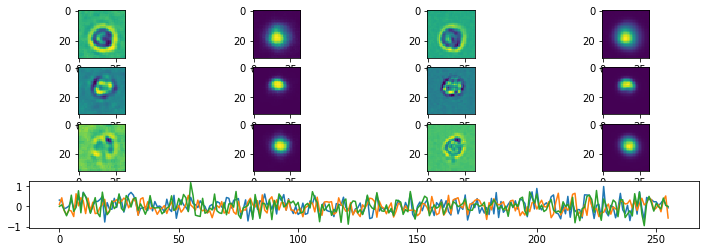

Iteration:  5100 Loss:  844.286
Test Loss 834.9548
Iteration:  5200 Loss:  831.98083
Test Loss 834.6963
Iteration:  5300 Loss:  843.73517
Test Loss 834.6436
Iteration:  5400 Loss:  832.7861
Test Loss 834.5042
Iteration:  5500 Loss:  838.93665
Test Loss 834.4329
Iteration:  5600 Loss:  841.27356
Test Loss 834.1907
Iteration:  5700 Loss:  818.80023
Test Loss 834.1332
Iteration:  5800 Loss:  847.4214
Test Loss 833.96204
Iteration:  5900 Loss:  837.72345
Test Loss 833.947
Iteration:  6000 Loss:  844.77295
Test Loss 833.84674
Iteration:  6000 Loss:  844.77295
Test Loss 833.84674


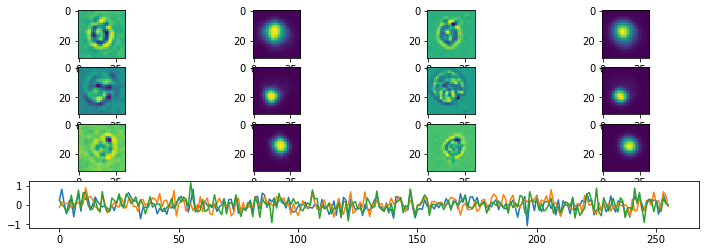

Iteration:  6100 Loss:  842.699
Test Loss 833.70844
Iteration:  6200 Loss:  837.4054
Test Loss 833.5533
Iteration:  6300 Loss:  835.6751
Test Loss 833.37634
Iteration:  6400 Loss:  838.524
Test Loss 833.5369
Iteration:  6500 Loss:  844.23303
Test Loss 833.23676
Iteration:  6600 Loss:  821.7628
Test Loss 833.3059
Iteration:  6700 Loss:  842.70105
Test Loss 833.1046
Iteration:  6800 Loss:  846.68835
Test Loss 832.9918
Iteration:  6900 Loss:  844.63403
Test Loss 833.0467
Iteration:  7000 Loss:  836.36633
Test Loss 832.8062
Iteration:  7000 Loss:  836.36633
Test Loss 832.8062


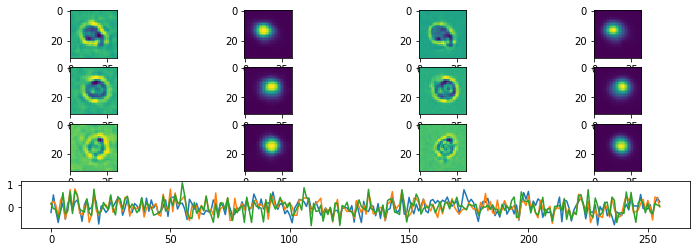

Iteration:  7100 Loss:  838.68146
Test Loss 832.75415
Iteration:  7200 Loss:  836.8144
Test Loss 832.68445
Iteration:  7300 Loss:  833.9253
Test Loss 832.5188
Iteration:  7400 Loss:  840.18506
Test Loss 832.47314
Iteration:  7500 Loss:  832.99774
Test Loss 832.36035
Iteration:  7600 Loss:  830.1859
Test Loss 832.4253
Iteration:  7700 Loss:  829.2357
Test Loss 832.49207
Iteration:  7800 Loss:  838.3659
Test Loss 832.19434
Iteration:  7900 Loss:  822.4553
Test Loss 832.1141
Iteration:  8000 Loss:  839.5923
Test Loss 832.04224
Iteration:  8000 Loss:  839.5923
Test Loss 832.04224


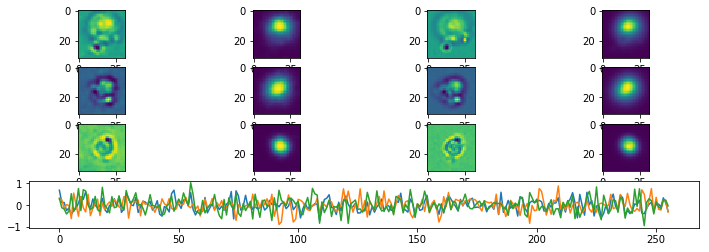

Iteration:  8100 Loss:  831.00085
Test Loss 832.0224
Iteration:  8200 Loss:  834.03156
Test Loss 832.02344
Iteration:  8300 Loss:  831.0183
Test Loss 831.897
Iteration:  8400 Loss:  830.9652
Test Loss 832.07684
Iteration:  8500 Loss:  832.22516
Test Loss 831.81586
Iteration:  8600 Loss:  837.0907
Test Loss 831.8168
Iteration:  8700 Loss:  826.2075
Test Loss 831.703
Iteration:  8800 Loss:  820.68787
Test Loss 831.6443
Iteration:  8900 Loss:  834.03845
Test Loss 831.55316
Iteration:  9000 Loss:  829.1848
Test Loss 831.5763
Iteration:  9000 Loss:  829.1848
Test Loss 831.5763


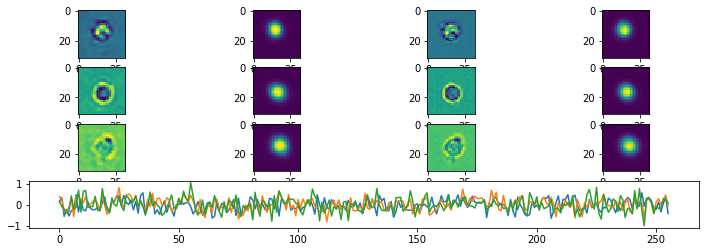

Iteration:  9100 Loss:  841.54565
Test Loss 831.5072
Iteration:  9200 Loss:  827.3773
Test Loss 831.4249
Iteration:  9300 Loss:  832.83307
Test Loss 831.56104
Iteration:  9400 Loss:  848.9064
Test Loss 831.36774
Iteration:  9500 Loss:  830.6898
Test Loss 831.42725
Iteration:  9600 Loss:  832.9271
Test Loss 831.24963
Iteration:  9700 Loss:  835.4595
Test Loss 831.18823
Iteration:  9800 Loss:  836.48645
Test Loss 831.17926
Iteration:  9900 Loss:  846.9099
Test Loss 831.241
Iteration:  10000 Loss:  834.60986
Test Loss 831.06775
Iteration:  10000 Loss:  834.60986
Test Loss 831.06775


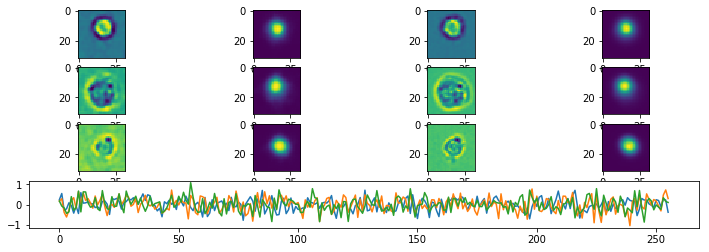

Iteration:  10100 Loss:  825.2828
Test Loss 831.0871
Iteration:  10200 Loss:  845.5346
Test Loss 830.98596
Iteration:  10300 Loss:  831.12115
Test Loss 830.94965
Iteration:  10400 Loss:  830.1564
Test Loss 830.9082
Iteration:  10500 Loss:  837.04
Test Loss 830.89386
Iteration:  10600 Loss:  825.54297
Test Loss 830.94556
Iteration:  10700 Loss:  826.92944
Test Loss 830.80554
Iteration:  10800 Loss:  838.3243
Test Loss 830.7525
Iteration:  10900 Loss:  827.5182
Test Loss 830.6435
Iteration:  11000 Loss:  835.8345
Test Loss 830.7109
Iteration:  11000 Loss:  835.8345
Test Loss 830.7109


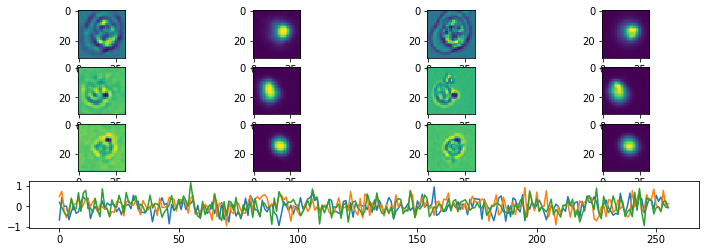

Iteration:  11100 Loss:  835.1266
Test Loss 830.6393
Iteration:  11200 Loss:  838.7333
Test Loss 830.5517
Iteration:  11300 Loss:  837.891
Test Loss 830.64746
Iteration:  11400 Loss:  842.23566
Test Loss 830.64325
Iteration:  11500 Loss:  825.1356
Test Loss 830.542
Iteration:  11600 Loss:  839.73395
Test Loss 830.535
Iteration:  11700 Loss:  835.50244
Test Loss 830.4891
Iteration:  11800 Loss:  847.30005
Test Loss 830.4471
Iteration:  11900 Loss:  832.38354
Test Loss 830.4463
Iteration:  12000 Loss:  830.0028
Test Loss 830.361
Iteration:  12000 Loss:  830.0028
Test Loss 830.361


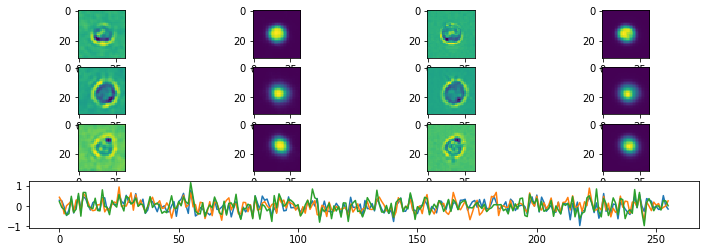

Iteration:  12100 Loss:  830.7394
Test Loss 830.3929
Iteration:  12200 Loss:  840.2825
Test Loss 830.33636
Iteration:  12300 Loss:  837.68994
Test Loss 830.3826
Iteration:  12400 Loss:  837.33765
Test Loss 830.6578
Iteration:  12500 Loss:  843.22986
Test Loss 830.49677
Iteration:  12600 Loss:  833.51154
Test Loss 830.37506
Iteration:  12700 Loss:  841.6869
Test Loss 830.43665
Iteration:  12800 Loss:  830.58606
Test Loss 830.1813
Iteration:  12900 Loss:  846.4927
Test Loss 830.15094
Iteration:  13000 Loss:  835.84863
Test Loss 830.13135
Iteration:  13000 Loss:  835.84863
Test Loss 830.13135


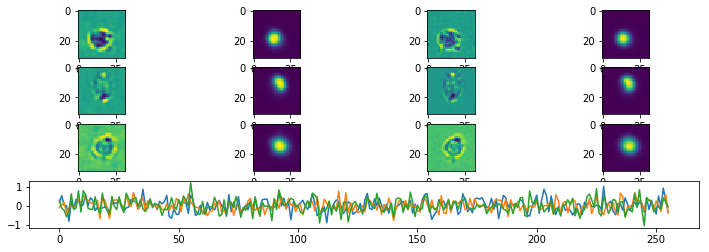

Iteration:  13100 Loss:  827.95874
Test Loss 830.0518
Iteration:  13200 Loss:  831.36346
Test Loss 830.1026
Iteration:  13300 Loss:  823.83966
Test Loss 830.1194
Iteration:  13400 Loss:  831.8032
Test Loss 830.01904
Iteration:  13500 Loss:  836.68317
Test Loss 829.9782
Iteration:  13600 Loss:  831.07227
Test Loss 830.01337
Iteration:  13700 Loss:  834.1395
Test Loss 829.934
Iteration:  13800 Loss:  834.71936
Test Loss 829.9155
Iteration:  13900 Loss:  843.0799
Test Loss 830.1874
Iteration:  14000 Loss:  832.79065
Test Loss 829.9194
Iteration:  14000 Loss:  832.79065
Test Loss 829.9194


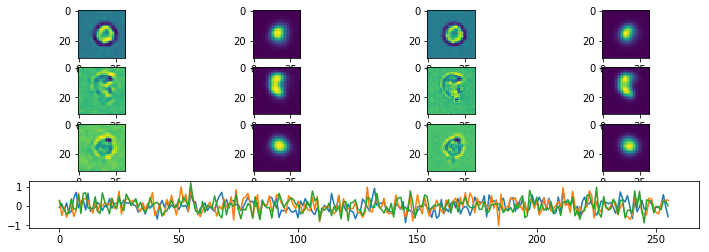

Iteration:  14100 Loss:  833.40027
Test Loss 829.8808
Iteration:  14200 Loss:  823.41675
Test Loss 830.0708
Iteration:  14300 Loss:  840.4221
Test Loss 829.93
Iteration:  14400 Loss:  836.63837
Test Loss 829.7976
Iteration:  14500 Loss:  834.1021
Test Loss 829.845
Iteration:  14600 Loss:  834.05566
Test Loss 829.8075
Iteration:  14700 Loss:  833.8488
Test Loss 829.76794
Iteration:  14800 Loss:  829.28595
Test Loss 829.7864
Iteration:  14900 Loss:  841.8278
Test Loss 829.73755
Iteration:  15000 Loss:  833.9429
Test Loss 829.66394
Iteration:  15000 Loss:  833.9429
Test Loss 829.66394


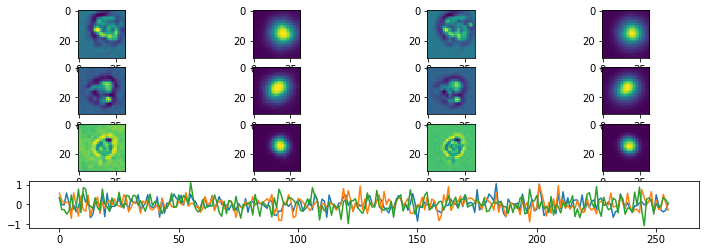

Iteration:  15100 Loss:  835.3098
Test Loss 829.7603
Iteration:  15200 Loss:  836.62854
Test Loss 829.7059
Iteration:  15300 Loss:  835.25806
Test Loss 829.60645
Iteration:  15400 Loss:  839.65576
Test Loss 829.59344
Iteration:  15500 Loss:  823.27344
Test Loss 829.6084
Iteration:  15600 Loss:  833.9349
Test Loss 829.60046
Iteration:  15700 Loss:  838.7177
Test Loss 829.76495
Iteration:  15800 Loss:  827.42596
Test Loss 829.8434
Iteration:  15900 Loss:  820.0453
Test Loss 829.54736
Iteration:  16000 Loss:  834.89734
Test Loss 829.5382
Iteration:  16000 Loss:  834.89734
Test Loss 829.5382


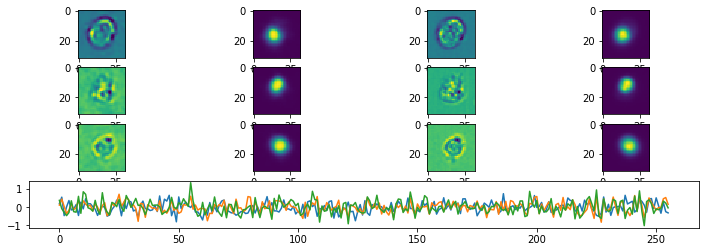

Iteration:  16100 Loss:  840.7345
Test Loss 829.5163
Iteration:  16200 Loss:  831.5297
Test Loss 829.6192
Iteration:  16300 Loss:  833.5257
Test Loss 829.5545
Iteration:  16400 Loss:  817.03784
Test Loss 829.6211
Iteration:  16500 Loss:  830.1373
Test Loss 829.4264
Iteration:  16600 Loss:  829.37054
Test Loss 829.5357
Iteration:  16700 Loss:  836.86536
Test Loss 829.42944
Iteration:  16800 Loss:  830.5073
Test Loss 829.4446
Iteration:  16900 Loss:  833.2588
Test Loss 829.5069
Iteration:  17000 Loss:  836.0636
Test Loss 829.3777
Iteration:  17000 Loss:  836.0636
Test Loss 829.3777


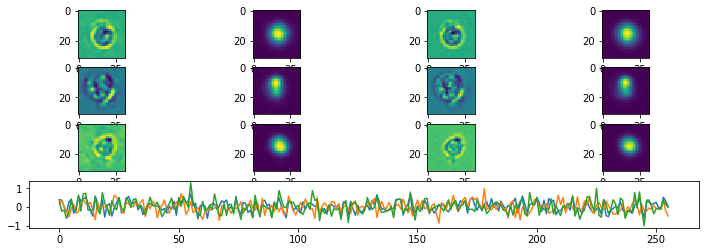

Iteration:  17100 Loss:  830.5149
Test Loss 829.3622
Iteration:  17200 Loss:  826.6505
Test Loss 829.36523
Iteration:  17300 Loss:  823.25964
Test Loss 829.4962
Iteration:  17400 Loss:  831.4612
Test Loss 829.34534
Iteration:  17500 Loss:  818.5934
Test Loss 829.36
Iteration:  17600 Loss:  837.1617
Test Loss 829.2804
Iteration:  17700 Loss:  833.04333
Test Loss 829.2594
Iteration:  17800 Loss:  837.4811
Test Loss 829.26953
Iteration:  17900 Loss:  837.99603
Test Loss 829.2537
Iteration:  18000 Loss:  834.0651
Test Loss 829.23425
Iteration:  18000 Loss:  834.0651
Test Loss 829.23425


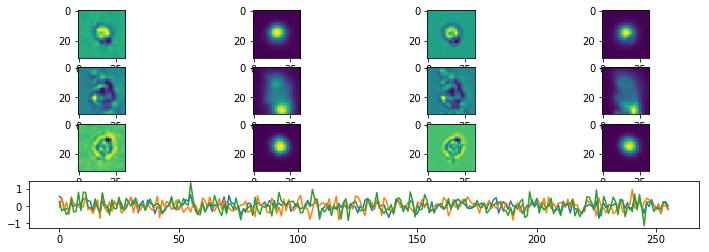

Iteration:  18100 Loss:  827.3031
Test Loss 829.286
Iteration:  18200 Loss:  825.31903
Test Loss 829.16907
Iteration:  18300 Loss:  815.9018
Test Loss 829.1526
Iteration:  18400 Loss:  831.127
Test Loss 829.1929
Iteration:  18500 Loss:  844.506
Test Loss 829.1949
Iteration:  18600 Loss:  829.59717
Test Loss 829.13727
Iteration:  18700 Loss:  840.9979
Test Loss 829.1812
Iteration:  18800 Loss:  831.62164
Test Loss 829.1341
Iteration:  18900 Loss:  827.6038
Test Loss 829.1675
Iteration:  19000 Loss:  834.764
Test Loss 829.0828
Iteration:  19000 Loss:  834.764
Test Loss 829.0828


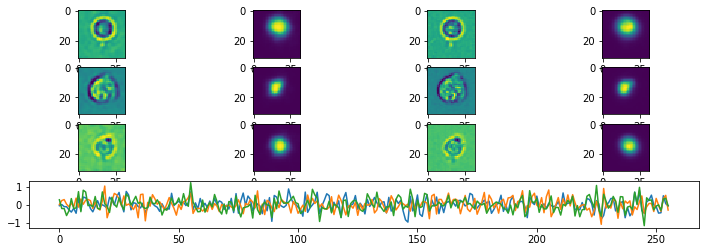

Iteration:  19100 Loss:  830.84705
Test Loss 829.26373
Iteration:  19200 Loss:  842.6108
Test Loss 829.09106
Iteration:  19300 Loss:  834.5182
Test Loss 829.19336
Iteration:  19400 Loss:  826.1658
Test Loss 829.07086
Iteration:  19500 Loss:  822.64087
Test Loss 829.1501
Iteration:  19600 Loss:  828.50916
Test Loss 829.01117
Iteration:  19700 Loss:  835.3995
Test Loss 829.2067
Iteration:  19800 Loss:  848.02405
Test Loss 829.10236
Iteration:  19900 Loss:  833.7005
Test Loss 829.01056
Iteration:  20000 Loss:  830.9029
Test Loss 829.1199
Iteration:  20000 Loss:  830.9029
Test Loss 829.1199


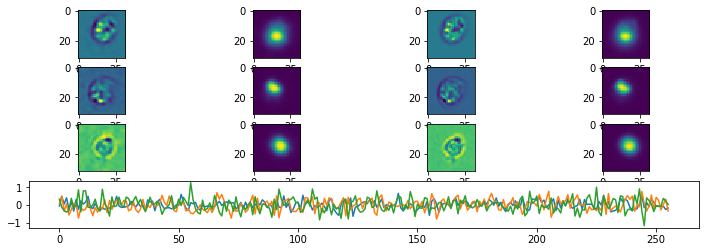

Iteration:  20100 Loss:  827.6117
Test Loss 829.09436
Iteration:  20200 Loss:  833.1704
Test Loss 829.05255
Iteration:  20300 Loss:  834.40265
Test Loss 828.9242
Iteration:  20400 Loss:  830.3837
Test Loss 828.9293
Iteration:  20500 Loss:  826.0079
Test Loss 829.00824
Iteration:  20600 Loss:  833.03546
Test Loss 828.90564
Iteration:  20700 Loss:  830.8479
Test Loss 828.93445
Iteration:  20800 Loss:  823.45447
Test Loss 828.9351
Iteration:  20900 Loss:  843.115
Test Loss 828.9628
Iteration:  21000 Loss:  824.3182
Test Loss 828.90436
Iteration:  21000 Loss:  824.3182
Test Loss 828.90436


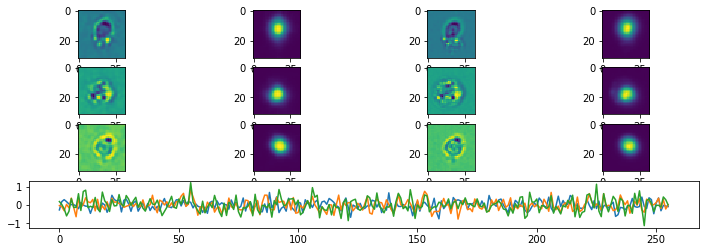

Iteration:  21100 Loss:  823.3043
Test Loss 828.8341
Iteration:  21200 Loss:  836.543
Test Loss 828.8015
Iteration:  21300 Loss:  834.99756
Test Loss 828.9061
Iteration:  21400 Loss:  821.39417
Test Loss 828.8493
Iteration:  21500 Loss:  828.64685
Test Loss 828.8768
Iteration:  21600 Loss:  822.4335
Test Loss 828.833
Iteration:  21700 Loss:  847.8127
Test Loss 828.93414
Iteration:  21800 Loss:  833.6627
Test Loss 828.7972
Iteration:  21900 Loss:  832.3993
Test Loss 828.81635
Iteration:  22000 Loss:  839.94385
Test Loss 828.7562
Iteration:  22000 Loss:  839.94385
Test Loss 828.7562


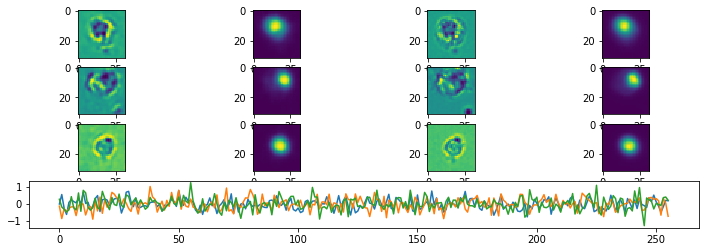

Iteration:  22100 Loss:  837.34656
Test Loss 828.807
Iteration:  22200 Loss:  838.8937
Test Loss 828.9247
Iteration:  22300 Loss:  826.7142
Test Loss 828.8144
Iteration:  22400 Loss:  833.7234
Test Loss 828.7337
Iteration:  22500 Loss:  836.1657
Test Loss 828.72577
Iteration:  22600 Loss:  828.5916
Test Loss 828.8282
Iteration:  22700 Loss:  823.9128
Test Loss 828.7889
Iteration:  22800 Loss:  838.6536
Test Loss 828.6846
Iteration:  22900 Loss:  826.1234
Test Loss 828.74445
Iteration:  23000 Loss:  848.56226
Test Loss 828.75464
Iteration:  23000 Loss:  848.56226
Test Loss 828.75464


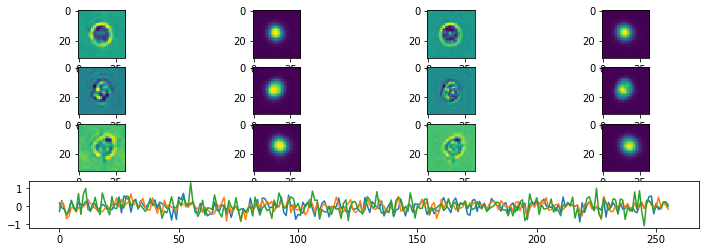

Iteration:  23100 Loss:  841.1696
Test Loss 828.772
Iteration:  23200 Loss:  830.96387
Test Loss 828.67053
Iteration:  23300 Loss:  829.57166
Test Loss 829.0254
Iteration:  23400 Loss:  838.53577
Test Loss 828.7214
Iteration:  23500 Loss:  821.31165
Test Loss 828.76086
Iteration:  23600 Loss:  829.15295
Test Loss 828.67004
Iteration:  23700 Loss:  819.95056
Test Loss 828.63934
Iteration:  23800 Loss:  830.34674
Test Loss 828.70593
Iteration:  23900 Loss:  829.96277
Test Loss 828.7058
Iteration:  24000 Loss:  839.30835
Test Loss 828.6301
Iteration:  24000 Loss:  839.30835
Test Loss 828.6301


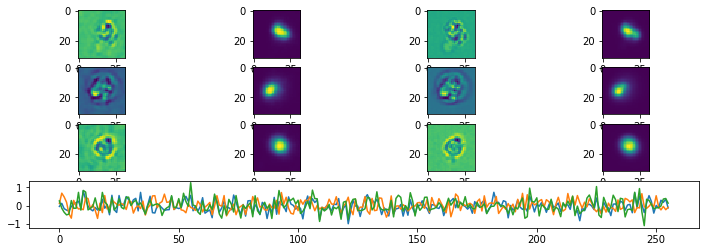

Iteration:  24100 Loss:  829.41046
Test Loss 828.7191
Iteration:  24200 Loss:  838.3479
Test Loss 828.64374
Iteration:  24300 Loss:  833.8188
Test Loss 828.5731
Iteration:  24400 Loss:  834.518
Test Loss 828.57654
Iteration:  24500 Loss:  836.1764
Test Loss 828.5869
Iteration:  24600 Loss:  834.03674
Test Loss 828.6021
Iteration:  24700 Loss:  829.4099
Test Loss 828.61194
Iteration:  24800 Loss:  817.55493
Test Loss 828.74854
Iteration:  24900 Loss:  850.1548
Test Loss 828.5693
Iteration:  25000 Loss:  832.93726
Test Loss 828.5935
Iteration:  25000 Loss:  832.93726
Test Loss 828.5935


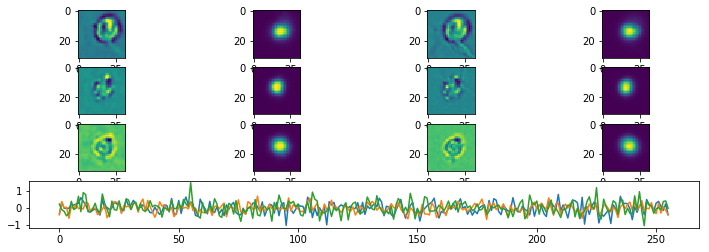

Iteration:  25100 Loss:  833.1477
Test Loss 828.5409
Iteration:  25200 Loss:  843.8578
Test Loss 828.57385
Iteration:  25300 Loss:  834.9866
Test Loss 828.4974
Iteration:  25400 Loss:  827.6451
Test Loss 828.51953
Iteration:  25500 Loss:  838.29254
Test Loss 828.6707
Iteration:  25600 Loss:  838.3628
Test Loss 828.6269
Iteration:  25700 Loss:  833.13715
Test Loss 828.4794
Iteration:  25800 Loss:  841.2509
Test Loss 828.51917
Iteration:  25900 Loss:  833.1073
Test Loss 828.4748
Iteration:  26000 Loss:  832.8463
Test Loss 828.5121
Iteration:  26000 Loss:  832.8463
Test Loss 828.5121


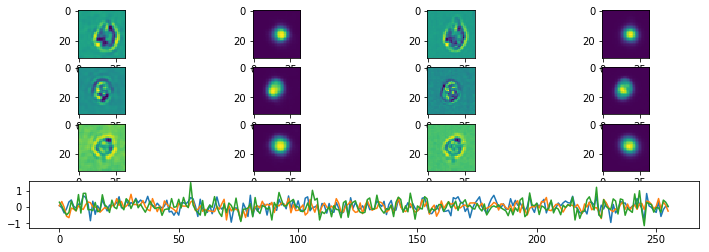

Iteration:  26100 Loss:  824.323
Test Loss 828.51636
Iteration:  26200 Loss:  835.0124
Test Loss 828.52924
Iteration:  26300 Loss:  822.67206
Test Loss 828.485
Iteration:  26400 Loss:  823.6926
Test Loss 828.42566
Iteration:  26500 Loss:  839.1312
Test Loss 828.399
Iteration:  26600 Loss:  830.2565
Test Loss 828.4154
Iteration:  26700 Loss:  837.1653
Test Loss 828.38055
Iteration:  26800 Loss:  832.9452
Test Loss 828.43414
Iteration:  26900 Loss:  832.4712
Test Loss 828.3948
Iteration:  27000 Loss:  841.8035
Test Loss 828.43005
Iteration:  27000 Loss:  841.8035
Test Loss 828.43005


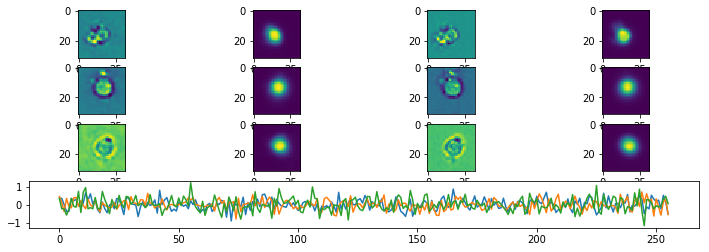

Iteration:  27100 Loss:  832.6266
Test Loss 828.42755
Iteration:  27200 Loss:  833.38696
Test Loss 828.3823
Iteration:  27300 Loss:  831.5999
Test Loss 828.41956
Iteration:  27400 Loss:  830.5413
Test Loss 828.43677
Iteration:  27500 Loss:  828.0448
Test Loss 828.32275
Iteration:  27600 Loss:  823.2106
Test Loss 828.4508
Iteration:  27700 Loss:  825.9497
Test Loss 828.4891
Iteration:  27800 Loss:  824.4932
Test Loss 828.3645
Iteration:  27900 Loss:  831.07556
Test Loss 828.41986
Iteration:  28000 Loss:  838.10864
Test Loss 828.3615
Iteration:  28000 Loss:  838.10864
Test Loss 828.3615


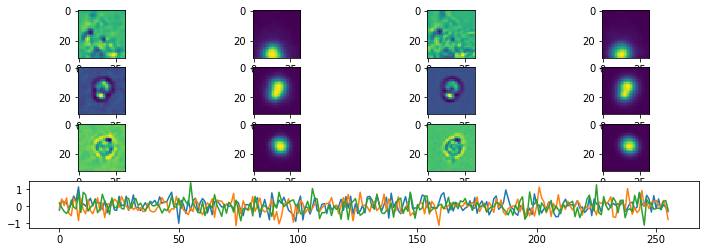

Iteration:  28100 Loss:  840.0188
Test Loss 828.2913
Iteration:  28200 Loss:  824.6107
Test Loss 828.37964
Iteration:  28300 Loss:  830.4192
Test Loss 828.3364
Iteration:  28400 Loss:  842.3059
Test Loss 828.29584
Iteration:  28500 Loss:  833.5113
Test Loss 828.27325
Iteration:  28600 Loss:  824.16455
Test Loss 828.3178
Iteration:  28700 Loss:  829.3727
Test Loss 828.2726
Iteration:  28800 Loss:  822.8898
Test Loss 828.30237
Iteration:  28900 Loss:  831.4331
Test Loss 828.26526
Iteration:  29000 Loss:  833.7015
Test Loss 828.24744
Iteration:  29000 Loss:  833.7015
Test Loss 828.24744


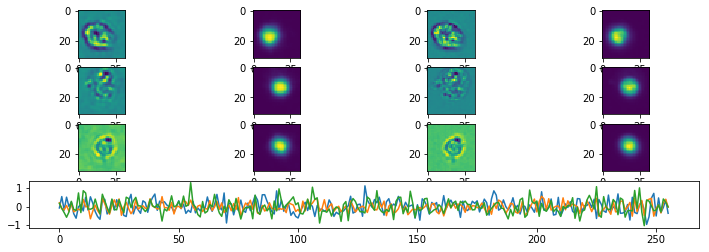

Iteration:  29100 Loss:  828.8916
Test Loss 828.2676
Iteration:  29200 Loss:  832.261
Test Loss 828.27814
Iteration:  29300 Loss:  833.9135
Test Loss 828.3467
Iteration:  29400 Loss:  832.85516
Test Loss 828.29376
Iteration:  29500 Loss:  810.31323
Test Loss 828.35114
Iteration:  29600 Loss:  830.71625
Test Loss 828.2638
Iteration:  29700 Loss:  829.45874
Test Loss 828.22925
Iteration:  29800 Loss:  839.14056
Test Loss 828.32074
Iteration:  29900 Loss:  833.1677
Test Loss 828.23676
Iteration:  30000 Loss:  837.0686
Test Loss 828.28656
Iteration:  30000 Loss:  837.0686
Test Loss 828.28656


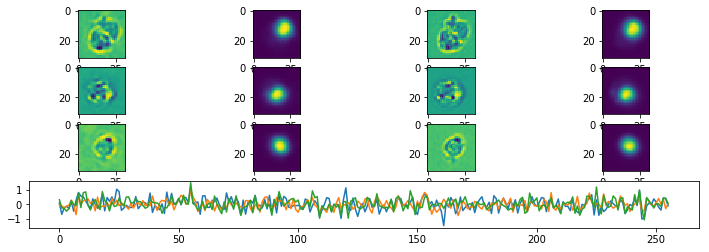

Iteration:  30100 Loss:  833.5617
Test Loss 828.24396
Iteration:  30200 Loss:  837.20605
Test Loss 828.30634
Iteration:  30300 Loss:  828.29285
Test Loss 828.1912
Iteration:  30400 Loss:  827.2345
Test Loss 828.1541
Iteration:  30500 Loss:  830.9314
Test Loss 828.3424
Iteration:  30600 Loss:  827.3025
Test Loss 828.20825
Iteration:  30700 Loss:  828.4645
Test Loss 828.1609
Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 2
p_channels = [0, 4]
p_nepochs = 240
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 256 #128 + 64
p_droprate = 0.75
p_stdev = .04
p_slam = .000
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-12-31-Snail_rop_bf_nuc_ce"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 1000, cpdir, tloss=.0001)

In [5]:
x = 4
x

4